In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import skew

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.feature_selection import chi2           
from sklearn.feature_selection import f_regression
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("winequality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.shape

(6497, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


## Lets check the null values

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


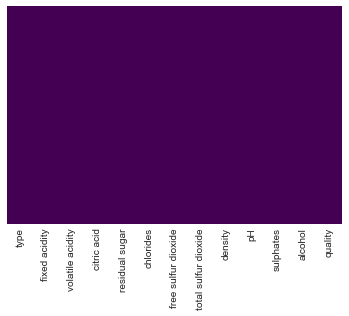

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

c=df.isnull().sum()
print(c[c>0])

In [7]:
# Filling Missing Values with Mean

for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [8]:
# Missing value replace with Mean value

df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Checking Correlation

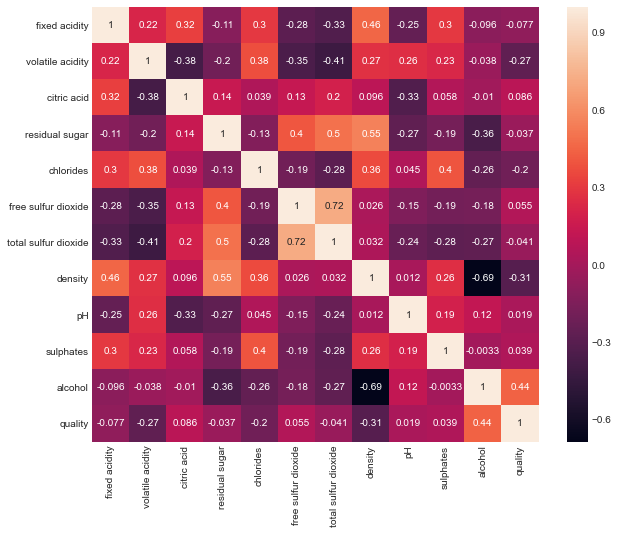

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## EDA

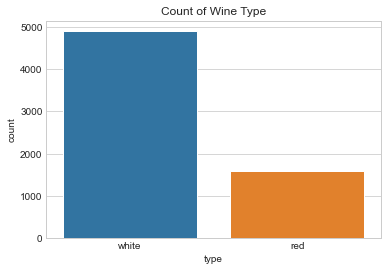

In [10]:
plt.title('Count of Wine Type')
sns.countplot(df['type'])
plt.show()

In [11]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

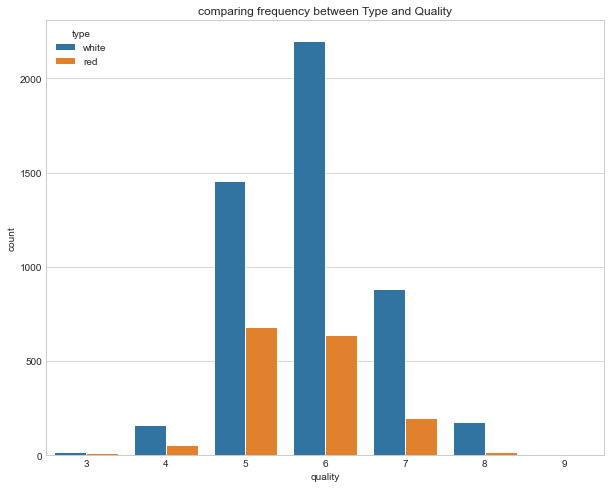

Above graph gives overview Qaulity of White Wine is much more Good than the others


In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='quality',hue='type',data=df)
plt.title('comparing frequency between Type and Quality')
plt.show()
print("Above graph gives overview Qaulity of White Wine is much more Good than the others")

For 2Features we use Bivariate Analysis


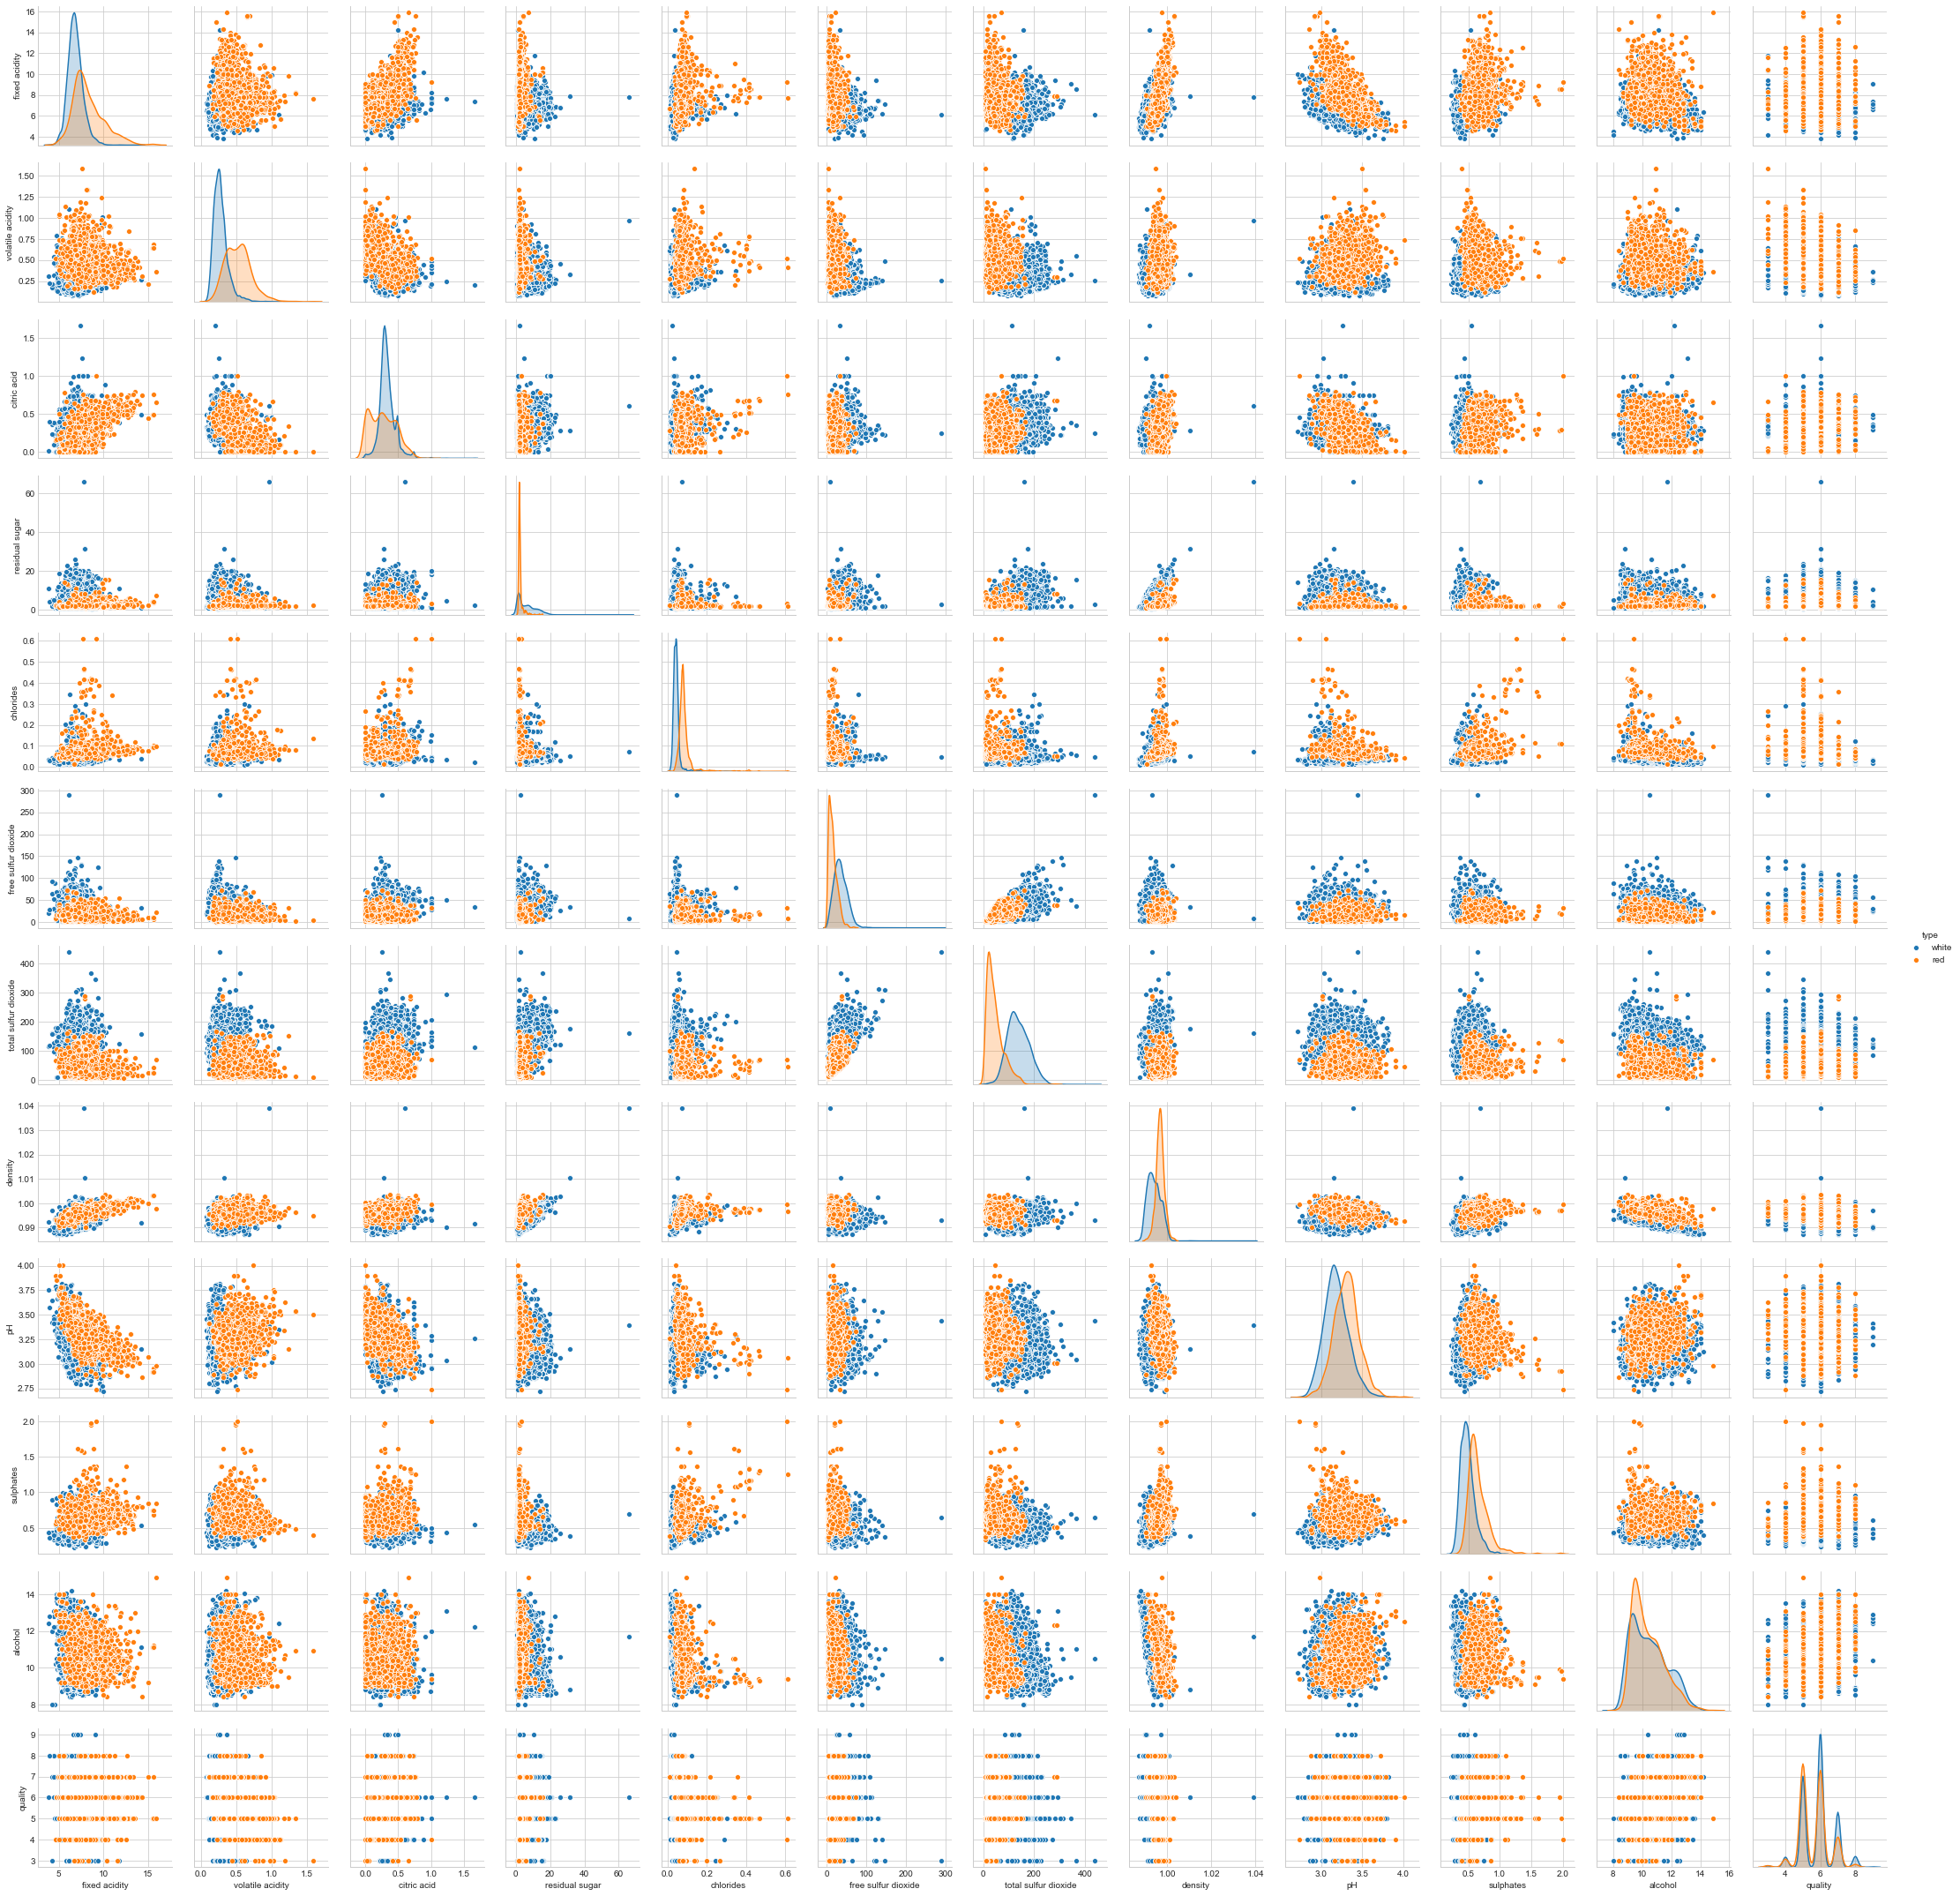

In [13]:
sns.pairplot(df,hue='type')
print("For 2Features we use Bivariate Analysis")

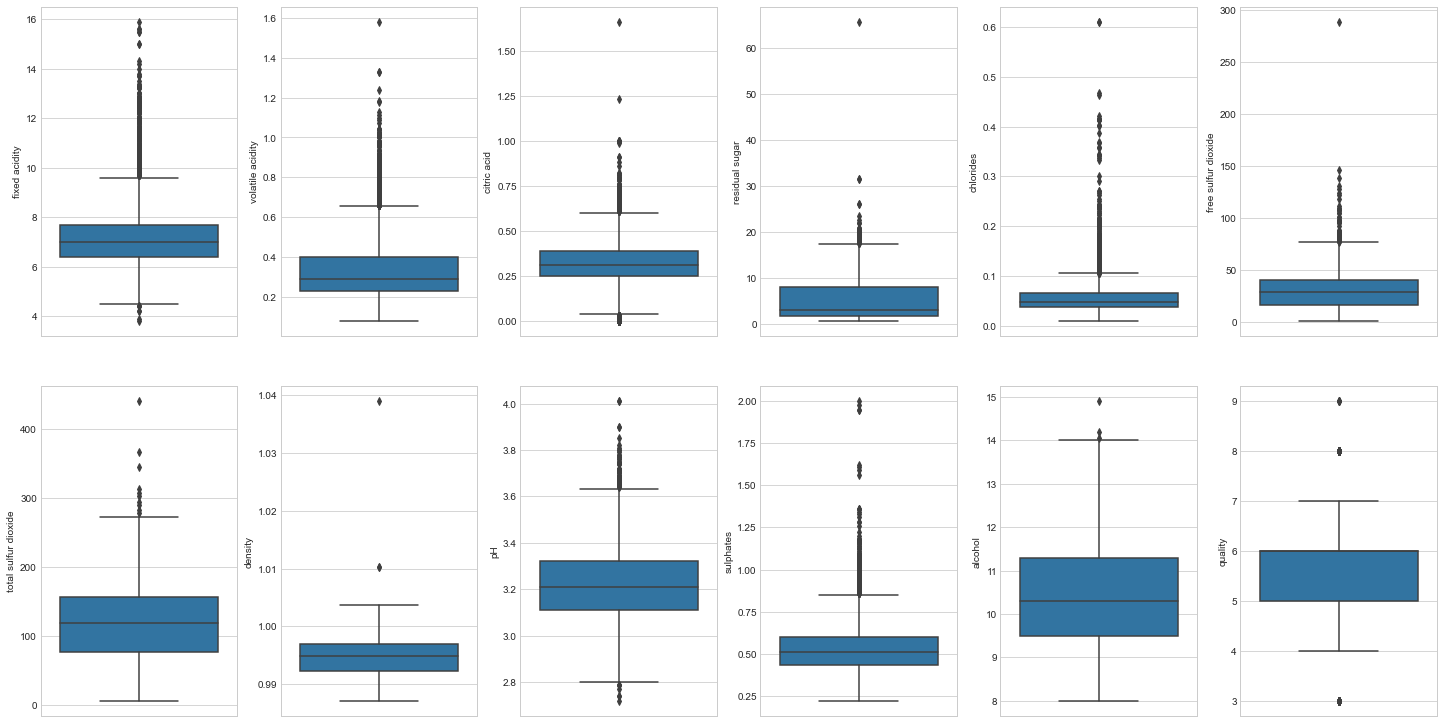

In [14]:
# Checking Outliers 
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [15]:
df.mean()

fixed acidity             7.216579
volatile acidity          0.339691
citric acid               0.318722
residual sugar            5.444326
chlorides                 0.056042
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218395
sulphates                 0.531215
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [16]:
df.std()

fixed acidity            1.295751
volatile acidity         0.164548
citric acid              0.145231
residual sugar           4.757392
chlorides                0.035031
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160637
sulphates                0.148768
alcohol                  1.192712
quality                  0.873255
dtype: float64

skewness:  1.7237332100228064
Mean:  7.216579312471082
Std:  1.2956516349473426


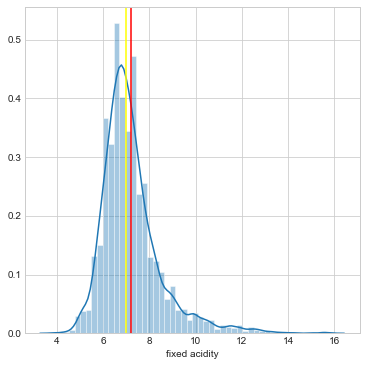

skewness:  1.4960872382618045
Mean:  0.3396910155648025
Std:  0.16453494870005295


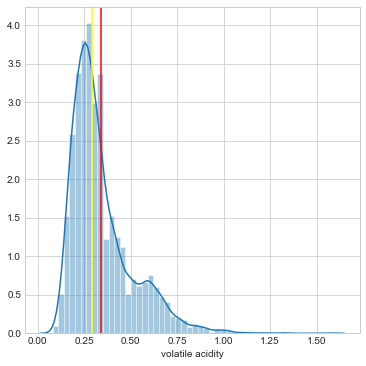

skewness:  0.47303238175058926
Mean:  0.3187218971358124
Std:  0.14522007614851715


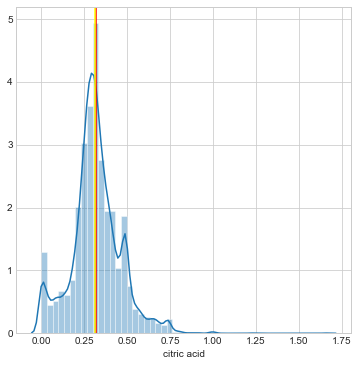

skewness:  1.434889280399139
Mean:  5.444326404926884
Std:  4.757026080027465


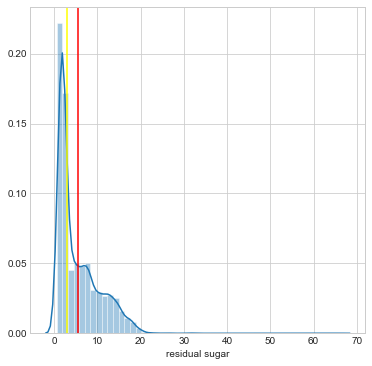

skewness:  5.399432733792378
Mean:  0.0560415704387993
Std:  0.035027935323638654


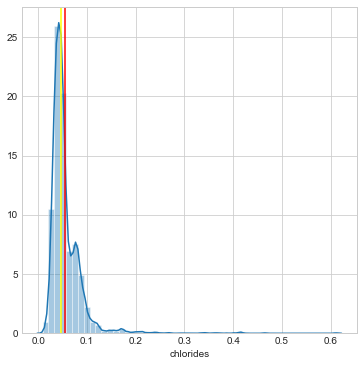

skewness:  1.219784372282318
Mean:  30.525319378174544
Std:  17.74803375054582


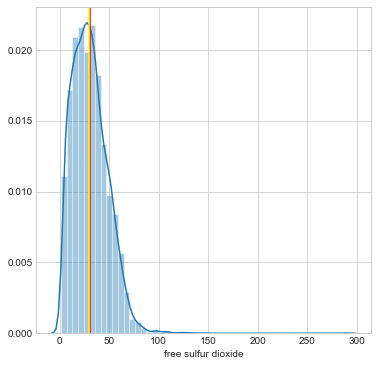

skewness:  -0.001177206365785478
Mean:  115.7445744189626
Std:  56.51750451265562


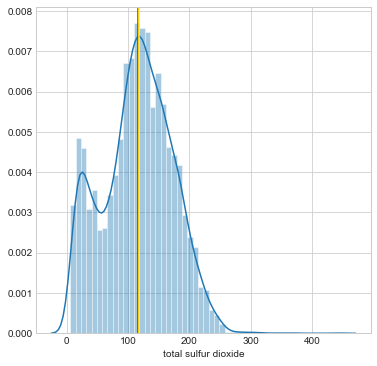

skewness:  0.5034854532378834
Mean:  0.9946966338309937
Std:  0.0029984422211732876


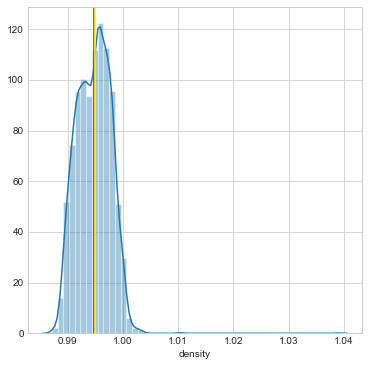

skewness:  0.38714470176958515
Mean:  3.2183954993834734
Std:  0.16062454927135444


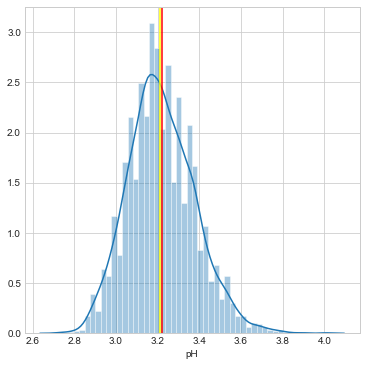

skewness:  1.7986052869527671
Mean:  0.5312151547820744
Std:  0.14875684766550085


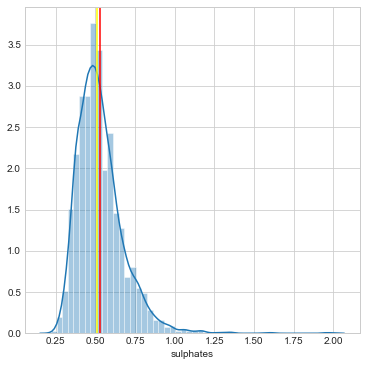

skewness:  0.5655871101918292
Mean:  10.491800831149511
Std:  1.1926199559147563


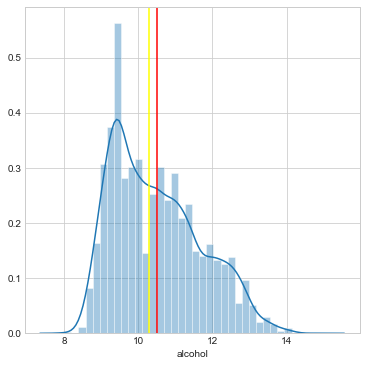

skewness:  0.18957891127582205
Mean:  5.818377712790519
Std:  0.8731880644450458


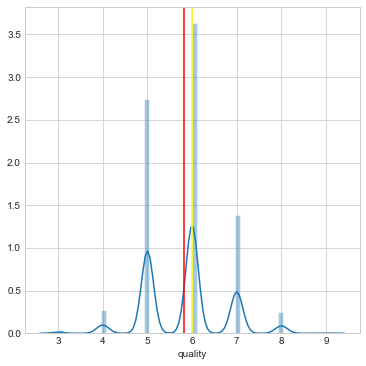

In [17]:
for col, value in df.items():
    if col != 'type':
        print("skewness: ",skew(value))
        print("Mean: ",np.mean(value))
        print("Std: ",np.std(value))
        width_mean = value.mean()
        width_median = value.median()

        plt.figure(figsize=(6,6))
        sns.distplot(value)

        plt.axvline(width_mean,color="red")
        plt.axvline(width_median,color="yellow")
        plt.show()        

In [18]:
# Removing Skweness

df["fixed acidity"] = np.log(df["fixed acidity"])
df["volatile acidity"] = np.sqrt(df["volatile acidity"])
df["residual sugar"] = np.sqrt(df["residual sugar"])
df["chlorides"] = np.log(df["chlorides"])
df["free sulfur dioxide"] = np.sqrt(df["free sulfur dioxide"])
df["sulphates"] = np.log(df["sulphates"])


# df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

In [19]:
for col,value in df.items():
    if col != 'type':
        print(col,"skewness: ",skew(value))

fixed acidity skewness:  0.888743675648165
volatile acidity skewness:  0.8886168470646959
citric acid skewness:  0.47303238175058926
residual sugar skewness:  0.7153786462741809
chlorides skewness:  0.8764224535344504
free sulfur dioxide skewness:  0.03137940491667202
total sulfur dioxide skewness:  -0.001177206365785478
density skewness:  0.5034854532378834
pH skewness:  0.38714470176958515
sulphates skewness:  0.4054774380743729
alcohol skewness:  0.5655871101918292
quality skewness:  0.18957891127582205


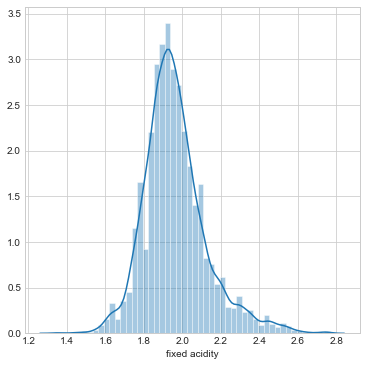

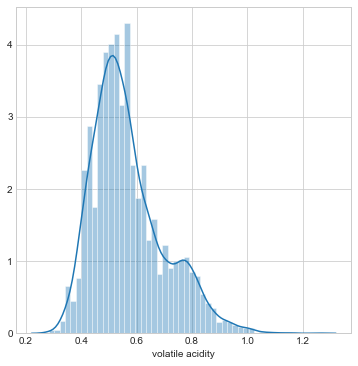

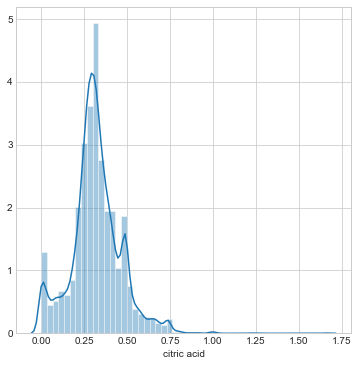

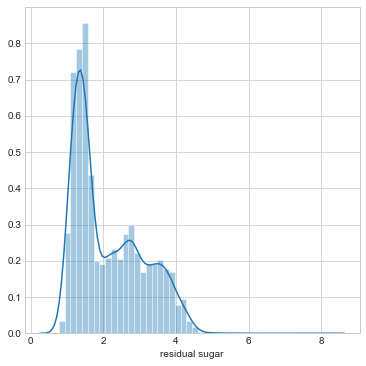

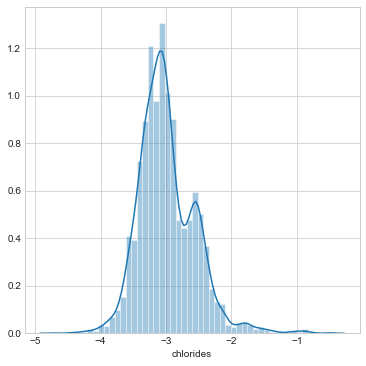

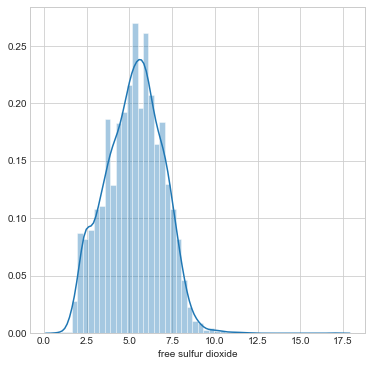

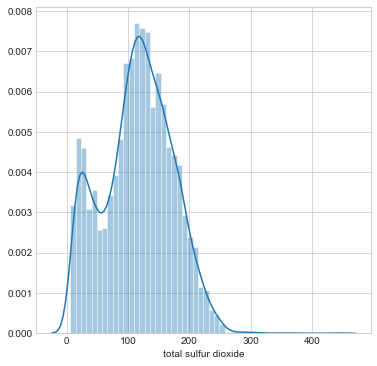

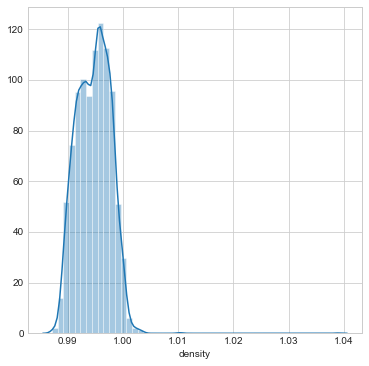

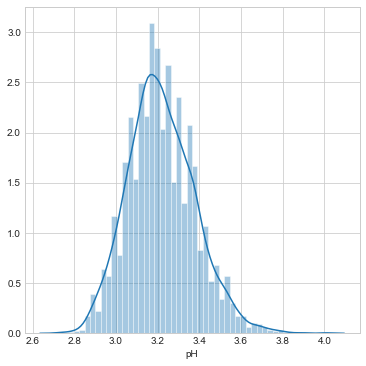

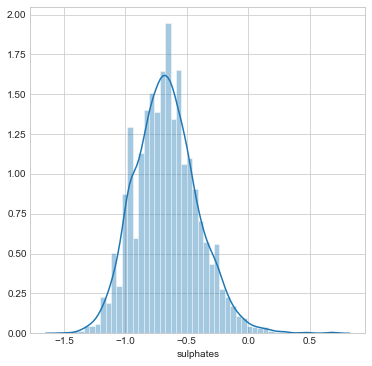

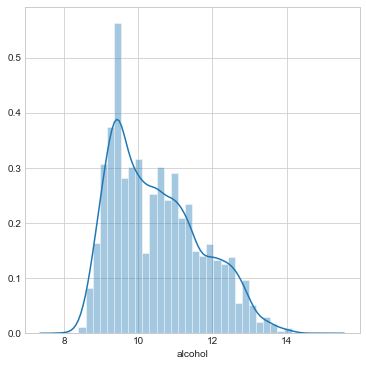

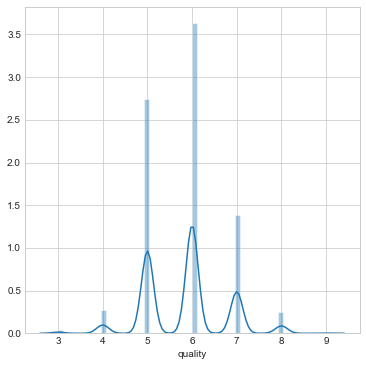

In [20]:
# After removing Skewness

for col, value in df.items():
    if col != 'type':
        plt.figure(figsize=(6,6))
        sns.distplot(value)
        plt.show() 

## Lets Map the Quality between Bad(0)-Mid(1)-Good(2)

In [21]:
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels = labels)

In [22]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,1.945910,0.519615,0.36,4.549725,-3.101093,6.708204,170.0,1.0010,3.00,-0.798508,8.8,1
1,white,1.840550,0.547723,0.34,1.264911,-3.015935,3.741657,132.0,0.9940,3.30,-0.713350,9.5,1
2,white,2.091864,0.529150,0.40,2.626785,-2.995732,5.477226,97.0,0.9951,3.26,-0.820981,10.1,1
3,white,1.974081,0.479583,0.32,2.915476,-2.847312,6.855655,186.0,0.9956,3.19,-0.916291,9.9,1
4,white,1.974081,0.479583,0.32,2.915476,-2.847312,6.855655,186.0,0.9956,3.19,-0.916291,9.9,1


## Splitting Dataset

In [23]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

## Standardizing Data

In [24]:
for col in X:
        ss= StandardScaler()
        X[col] = ss.fit_transform(X[[col]])

In [57]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.099229,-0.372675,0.284245,2.554891,-0.256735,0.875133,0.959976,2.102214,-1.359665,-0.512142,-1.418558
1,-0.741152,-0.156697,0.146523,-0.917666,-0.059163,-0.939557,0.287618,-0.232332,0.508045,-0.180751,-0.831615
2,0.790015,-0.299407,0.559689,0.522046,-0.012292,0.122121,-0.331660,0.134525,0.259017,-0.599596,-0.328521
3,0.072406,-0.680284,0.008801,0.827237,0.332053,0.965331,1.243074,0.301278,-0.176782,-0.970495,-0.496219
4,0.072406,-0.680284,0.008801,0.827237,0.332053,0.965331,1.243074,0.301278,-0.176782,-0.970495,-0.496219


In [26]:
# As Data is imbalanced we have to balanced it 

y.value_counts()

1    3915
0    2384
2     198
Name: quality, dtype: int64

In [27]:
# Balancing Data

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [28]:
y.value_counts()

2    3915
1    3915
0    3915
Name: quality, dtype: int64

## train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Deploying Model

In [30]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print("Accuracy:", model.score(X_test, y_test) * 100)
    return model

In [31]:
lr = LogisticRegression(random_state = 1)
classify(lr)

              precision    recall  f1-score   support

           0       0.67      0.73      0.69      1155
           1       0.48      0.38      0.42      1198
           2       0.62      0.70      0.66      1171

    accuracy                           0.60      3524
   macro avg       0.59      0.60      0.59      3524
weighted avg       0.59      0.60      0.59      3524

Accuracy: 59.93189557321226


LogisticRegression(random_state=1)

In [32]:
dt1=DecisionTreeClassifier(random_state=1)
classify(dt1)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1155
           1       0.74      0.72      0.73      1198
           2       0.91      0.94      0.92      1171

    accuracy                           0.81      3524
   macro avg       0.81      0.81      0.81      3524
weighted avg       0.81      0.81      0.81      3524

Accuracy: 80.90238365493757


DecisionTreeClassifier(random_state=1)

In [33]:
dt2=DecisionTreeClassifier(max_depth=10,random_state=1)
classify(dt2)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1155
           1       0.67      0.61      0.64      1198
           2       0.84      0.90      0.87      1171

    accuracy                           0.75      3524
   macro avg       0.75      0.75      0.75      3524
weighted avg       0.75      0.75      0.75      3524

Accuracy: 75.19863791146425


DecisionTreeClassifier(max_depth=10, random_state=1)

In [44]:
# K Nearest Neighbors Classifier
n = KNeighborsClassifier(n_neighbors = 3)
n.fit(X_train, y_train)
y_pred = n.predict(X_test)
print(classification_report(y_test, y_pred))
cross_val = cross_val_score(estimator=n, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1155
           1       0.82      0.64      0.72      1198
           2       0.90      1.00      0.94      1171

    accuracy                           0.83      3524
   macro avg       0.83      0.83      0.82      3524
weighted avg       0.83      0.83      0.82      3524

0.8211879865071412


In [45]:
def feature_select(criterion,count,model):
    test=SelectKBest(score_func=criterion,k=count)
    X_train_new=test.fit_transform(X_train,y_train)
    X_test_new=test.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred=model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(test.get_support())
    return model

In [46]:
def pca(count,model):
    pc = PCA(n_components = count, random_state =1)
    X_train_new = pc.fit_transform(X_train,y_train)
    X_test_new = pc.transform(X_test)
    
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    print(classification_report(y_test,y_pred))
    
    print(pc.components_)
    return model

In [50]:
feature_select(f_regression,8,lr)

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1155
           1       0.47      0.39      0.43      1198
           2       0.63      0.69      0.66      1171

    accuracy                           0.60      3524
   macro avg       0.59      0.60      0.59      3524
weighted avg       0.59      0.60      0.59      3524

[ True  True  True False  True  True False  True False  True  True]


LogisticRegression(random_state=1)

In [56]:
pca(8,lr)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1155
           1       0.46      0.38      0.42      1198
           2       0.63      0.70      0.66      1171

    accuracy                           0.59      3524
   macro avg       0.58      0.59      0.58      3524
weighted avg       0.57      0.59      0.58      3524

[[ 0.37627977  0.24629635  0.01441049  0.05889249  0.46287148 -0.20535447
  -0.15743489  0.50903128 -0.03177036  0.25144875 -0.43533983]
 [ 0.01523642  0.28716272 -0.1603759  -0.45183686  0.07126758 -0.39369539
  -0.44494512 -0.24587073  0.29251551  0.23456846  0.35824163]
 [ 0.49181041 -0.21562065  0.54089281 -0.08657029 -0.08185122 -0.20194387
  -0.1729975  -0.10746013 -0.50500494 -0.07167258  0.24989416]
 [-0.01481857 -0.31109441  0.38107058 -0.11730872  0.03175971  0.2717483
   0.17735611  0.01038344  0.29780851  0.73794184  0.06601263]
 [ 0.14967132  0.58094336 -0.03170057  0.45876167 -0.1026973   0.2344579

LogisticRegression(random_state=1)

## Linear SVM

In [58]:
lsvc=LinearSVC(random_state=1)
classify(lsvc)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1155
           1       0.49      0.24      0.32      1198
           2       0.59      0.77      0.67      1171

    accuracy                           0.60      3524
   macro avg       0.58      0.60      0.57      3524
weighted avg       0.58      0.60      0.57      3524

Accuracy: 59.87514188422247


LinearSVC(random_state=1)

In [81]:
# Soft-Margin

lsvc_soft=LinearSVC(C=0.6,random_state=1)
classify(lsvc_soft)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1155
           1       0.49      0.24      0.32      1198
           2       0.59      0.77      0.67      1171

    accuracy                           0.60      3524
   macro avg       0.58      0.60      0.57      3524
weighted avg       0.58      0.60      0.57      3524

Accuracy: 59.87514188422247


LinearSVC(C=0.6, random_state=1)

## Radial Bias svm

In [60]:
svc_rbf=SVC(C=0.5,kernel="rbf",random_state=1)
classify(svc_rbf)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1155
           1       0.70      0.49      0.57      1198
           2       0.76      0.95      0.84      1171

    accuracy                           0.74      3524
   macro avg       0.73      0.74      0.73      3524
weighted avg       0.73      0.74      0.73      3524

Accuracy: 74.03518728717367


SVC(C=0.5, random_state=1)

In [82]:
# Feature Selected Linear SVM

feature_select(f_regression,8,lsvc)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1155
           1       0.47      0.23      0.31      1198
           2       0.59      0.76      0.66      1171

    accuracy                           0.59      3524
   macro avg       0.56      0.59      0.56      3524
weighted avg       0.56      0.59      0.55      3524

[ True  True  True False  True  True False  True False  True  True]


LinearSVC(random_state=1)

In [83]:
# Feature Selected Soft-Margin SVM

feature_select(f_regression,8,lsvc_soft)

              precision    recall  f1-score   support

           0       0.64      0.79      0.70      1155
           1       0.46      0.23      0.31      1198
           2       0.59      0.76      0.66      1171

    accuracy                           0.59      3524
   macro avg       0.56      0.59      0.56      3524
weighted avg       0.56      0.59      0.55      3524

[ True  True  True False  True  True False  True False  True  True]


LinearSVC(C=0.6, random_state=1)

In [84]:
# Feature Selected Radial Bias SVM

feature_select(f_regression,8,svc_rbf)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1155
           1       0.65      0.42      0.51      1198
           2       0.72      0.91      0.81      1171

    accuracy                           0.70      3524
   macro avg       0.70      0.71      0.69      3524
weighted avg       0.69      0.70      0.69      3524

[ True  True  True False  True  True False  True False  True  True]


SVC(C=0.5, random_state=1)

In [64]:
pca(8,lsvc)

              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1155
           1       0.47      0.24      0.32      1198
           2       0.59      0.75      0.66      1171

    accuracy                           0.58      3524
   macro avg       0.56      0.59      0.56      3524
weighted avg       0.56      0.58      0.55      3524

[[ 0.37627977  0.24629635  0.01441049  0.05889249  0.46287148 -0.20535447
  -0.15743489  0.50903128 -0.03177036  0.25144875 -0.43533983]
 [ 0.01523642  0.28716272 -0.1603759  -0.45183686  0.07126758 -0.39369539
  -0.44494512 -0.24587073  0.29251551  0.23456846  0.35824163]
 [ 0.49181041 -0.21562065  0.54089281 -0.08657029 -0.08185122 -0.20194387
  -0.1729975  -0.10746013 -0.50500494 -0.07167258  0.24989416]
 [-0.01481857 -0.31109441  0.38107058 -0.11730872  0.03175971  0.2717483
   0.17735611  0.01038344  0.29780851  0.73794184  0.06601263]
 [ 0.14967132  0.58094336 -0.03170057  0.45876167 -0.1026973   0.2344579

LinearSVC(random_state=1)

In [65]:
pca(11,svc_rbf)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1155
           1       0.70      0.49      0.58      1198
           2       0.76      0.95      0.84      1171

    accuracy                           0.74      3524
   macro avg       0.74      0.74      0.73      3524
weighted avg       0.74      0.74      0.73      3524

[[ 0.37627977  0.24629635  0.01441049  0.05889249  0.46287148 -0.20535447
  -0.15743489  0.50903128 -0.03177036  0.25144875 -0.43533983]
 [ 0.01523642  0.28716272 -0.1603759  -0.45183686  0.07126758 -0.39369539
  -0.44494512 -0.24587073  0.29251551  0.23456846  0.35824163]
 [ 0.49181041 -0.21562065  0.54089281 -0.08657029 -0.08185122 -0.20194387
  -0.1729975  -0.10746013 -0.50500494 -0.07167258  0.24989416]
 [-0.01481857 -0.31109441  0.38107058 -0.11730872  0.03175971  0.2717483
   0.17735611  0.01038344  0.29780851  0.73794184  0.06601263]
 [ 0.14967132  0.58094336 -0.03170057  0.45876167 -0.1026973   0.2344579

SVC(C=0.5, random_state=1)

## RandomForest Classifier

In [66]:
rfc=RandomForestClassifier(n_estimators=100,max_features=6,random_state=1)
classify(rfc)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1155
           1       0.85      0.81      0.83      1198
           2       0.95      0.99      0.97      1171

    accuracy                           0.89      3524
   macro avg       0.88      0.89      0.88      3524
weighted avg       0.88      0.89      0.88      3524

Accuracy: 88.50737797956867


RandomForestClassifier(max_features=6, random_state=1)

## Naive Aggregation

In [67]:
model_list=[('n',n),('lsvc',lsvc),('svc_rbf',svc_rbf)]
vc1=VotingClassifier(estimators=model_list)
classify(vc1)

              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1155
           1       0.78      0.45      0.57      1198
           2       0.78      0.97      0.87      1171

    accuracy                           0.76      3524
   macro avg       0.76      0.76      0.74      3524
weighted avg       0.76      0.76      0.74      3524

Accuracy: 75.65266742338252


VotingClassifier(estimators=[('n', KNeighborsClassifier(n_neighbors=3)),
                             ('lsvc', LinearSVC(random_state=1)),
                             ('svc_rbf', SVC(C=0.5, random_state=1))])

## Bagging

In [85]:
bag1=BaggingClassifier(LogisticRegression(random_state=1),n_estimators=20,max_samples=100,random_state=1)
classify(bag1)

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1155
           1       0.49      0.33      0.39      1198
           2       0.61      0.72      0.66      1171

    accuracy                           0.60      3524
   macro avg       0.58      0.60      0.59      3524
weighted avg       0.58      0.60      0.58      3524

Accuracy: 59.87514188422247


BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  max_samples=100, n_estimators=20, random_state=1)

In [86]:
bag2=BaggingClassifier(SVC(kernel="rbf",random_state=1),n_estimators=20,max_samples=100,random_state=1)
classify(bag2)

              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1155
           1       0.48      0.29      0.36      1198
           2       0.65      0.70      0.67      1171

    accuracy                           0.60      3524
   macro avg       0.58      0.60      0.58      3524
weighted avg       0.58      0.60      0.58      3524

Accuracy: 59.84676503972758


BaggingClassifier(base_estimator=SVC(random_state=1), max_samples=100,
                  n_estimators=20, random_state=1)

## Pasting

In [87]:
bag3=BaggingClassifier(SVC(kernel="rbf",random_state=1),n_estimators=20,max_samples=100,random_state=1,bootstrap=False)
classify(bag3)

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1155
           1       0.47      0.36      0.41      1198
           2       0.65      0.68      0.67      1171

    accuracy                           0.60      3524
   macro avg       0.59      0.61      0.59      3524
weighted avg       0.59      0.60      0.59      3524

Accuracy: 60.30079455164585


BaggingClassifier(base_estimator=SVC(random_state=1), bootstrap=False,
                  max_samples=100, n_estimators=20, random_state=1)

## AdaBoost

In [73]:
ad=AdaBoostClassifier(n_estimators=100)
classify(ad)

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1155
           1       0.56      0.49      0.52      1198
           2       0.78      0.82      0.80      1171

    accuracy                           0.67      3524
   macro avg       0.67      0.68      0.67      3524
weighted avg       0.67      0.67      0.67      3524

Accuracy: 67.3950056753689


AdaBoostClassifier(n_estimators=100)

## GradienrBoosting

In [74]:
gb=GradientBoostingClassifier(n_estimators=100)
classify(gb)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1155
           1       0.73      0.64      0.68      1198
           2       0.86      0.94      0.89      1171

    accuracy                           0.79      3524
   macro avg       0.78      0.79      0.78      3524
weighted avg       0.78      0.79      0.78      3524

Accuracy: 78.54710556186151


GradientBoostingClassifier()

## Polynomial SVM

In [76]:
svc_poly=SVC(C=0.5,kernel="poly",random_state=1)
classify(svc_poly)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1155
           1       0.56      0.56      0.56      1198
           2       0.77      0.76      0.76      1171

    accuracy                           0.69      3524
   macro avg       0.69      0.69      0.69      3524
weighted avg       0.69      0.69      0.69      3524

Accuracy: 68.87060158910329


SVC(C=0.5, kernel='poly', random_state=1)

### K Nearest Neighbors and RandomForest Classifier gives the best Accuracy

### K Nearest Neighbors :- 83% accuracy
### RandomForest Classifier :- 89% accuracy